# Úkol č. 2 - regrese

  * **Deadline je do 4. 12. 2022, 23:59:59**, pokud odevzdáte úkol do 11. 12. 2022, 23:59:59, budete penalizování -4 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu se musíte vypořádat s problematikou regrese a hledání optimálních hyperparametrů.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

  * Zdrojem dat je soubor `LifeExpectancyData.csv` (originál zde: https://www.kaggle.com/kumarajarshi/life-expectancy-who).
  * Popis datasetu najdete na uvedené stránce s originálem datasetu.
  * Cílová (vysvětlovaná) proměnná se jmenuje `Life expectancy `.

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **16 bodů**:
  * Odeberte z datasetu datové body, u kterých neznáte vysvětlovanou proměnnou.
  * Rozdělte data na vhodné podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Na jeho základě adekvátně reagujte na problematické věci v datech (chybějící hodnoty, atd.) a vysvětlete motivaci k provedeným krokům.
  * Aplikujte lineární a hřebenovou regresi a výsledky řádně vyhodnoťte:
      * K měření chyby použijte MAE (mean absolute error) a RMSE (root mean squared error).

  * Zkoumejte, jak byste mohli modely vylepšit:
      * Experimentujte s tvorbou nových příznaků (na základě těch dostupných).
      * Experimentujte se standardizací/normalizací dat.
      * Vyberte si hyperparametry modelů k ladění a najděte jejich nejlepší hodnoty.
      * Získané výsledky vždy řádně okomentujte.
    
  * Použijte i jiné modely (alespoň jeden) probírané v předmětu BI-ML1 či i jiné, pokud víte, jak fungují.
  * Nakonec vyberte nejlepší model (vzhledem k RMSE) a odhadněte, jakou RMSE a MAE můžete očekávat na nových datech, která jste doposud neměli k dispozici.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.
  * Opravující Vám ve výjimečných případech může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale stěžejní a má hlavní vliv na hodnocení.

In [1]:
### odtud už je to Vaše

# Řešení

* Naimportujeme knihovny

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import optimize

## Příprava dat

* Načteme data

In [3]:
data = pd.read_csv("LifeExpectancyData.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


* Podiváme se na data aby zjístit počet NaN hodnot a datatypy sloupců.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

* Odebereme z datasetu datové body, u kterých neznáme vysvětlovanou proměnnou. Takových bodů je deset.

In [5]:
data = data.dropna(subset=['Life expectancy ']) 
data.isnull().sum(axis=0)

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

* Pokud se podíváme na prvních 5 řádku , zjistíme že příznak ```Population``` obsahuje chybné hodnoty. V jednom státě počet občasné se může lišit o několik milionů. V takovém případě můžeme ten příznak odstranit.

In [6]:
data = data.drop(columns=['Population'])

* Podíváme se na extrémy(min, max) jiných sloupců.

In [7]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,27.700000,28.600000,0.948000,20.700000


* Příznak  ```percentage expenditure``` má největší hodnotu 19479. Tato hodnota vůbec neodpovídá popisu tohoto příznaků, který je uveden na Kaggle. Zjistíme kolik hodnot tohoto příznaků jsou mimo rozsah(hodnoty větší než 100).

* Napíšeme funkci ```error_values```, která bude vypisovat  kolik chybných hodnot obsahuje příznak.


In [8]:
def error_values(name, max_count):
    err_data = data[data[name] > max_count]
    err_count = err_data[name].count()
    orig_count = data[name].count()
    in_percent = (err_count/orig_count)*100
    print("False data: " + str(err_count))
    print("Origin data: " + str(orig_count))
    print("In percent: " + str(in_percent))


In [9]:
error_values('percentage expenditure', 100)

False data: 1301
Origin data: 2928
In percent: 44.43306010928962


* Příznak ```Measles``` má největší hodnotu 212183. Tato hodnota taky vůbec neodpovídá popisu tohoto příznaků, který je uveden na Kaggle. Zjistíme kolik hodnot tohoto příznaků jsou mimo rozsah(hodnoty větší než 1000).

In [10]:
error_values('Measles ', 1000)

False data: 525
Origin data: 2928
In percent: 17.93032786885246


* Příznak ```infant deaths``` má největší hodnotu 1800. Tato hodnota taky vůbec neodpovídá popisu tohoto příznaků, který je uveden na Kaggle. Zjistíme kolik hodnot tohoto příznaků jsou mimo rozsah(hodnoty větší než 1000).

In [11]:
error_values('infant deaths', 1000)

False data: 13
Origin data: 2928
In percent: 0.44398907103825136


* Příznak ```under-five deaths``` má největší hodnotu 2500. Tato hodnota taky vůbec neodpovídá popisu tohoto příznaků, který je uveden na Kaggle. Zjistíme kolik hodnot tohoto příznaků jsou mimo rozsah(hodnoty větší než 1000).

In [12]:
error_values('under-five deaths ', 1000)

False data: 16
Origin data: 2928
In percent: 0.546448087431694


* Pro použití lineární/hřebenové regrese, musíme prozkoumat lineární závislost jednotlivých příznaků. Na to použijeme [Pearsonuv korelační koeficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). Pokud hodnoty koeficientu budou 1 nebo -1 v takovém případě příznaky jsou závisle. Ale budeme taky řešit případy skoro závislých příznaků, protože takové příznaky můžou taky ovlivnit výkonnost výsledného modelu.
* V pandasu použijeme metod ```corr()```, a pomocí knihovny ```seaborn```, vykreslíme heatmapu, aby výsledek byl víc přehledný.

<AxesSubplot: >

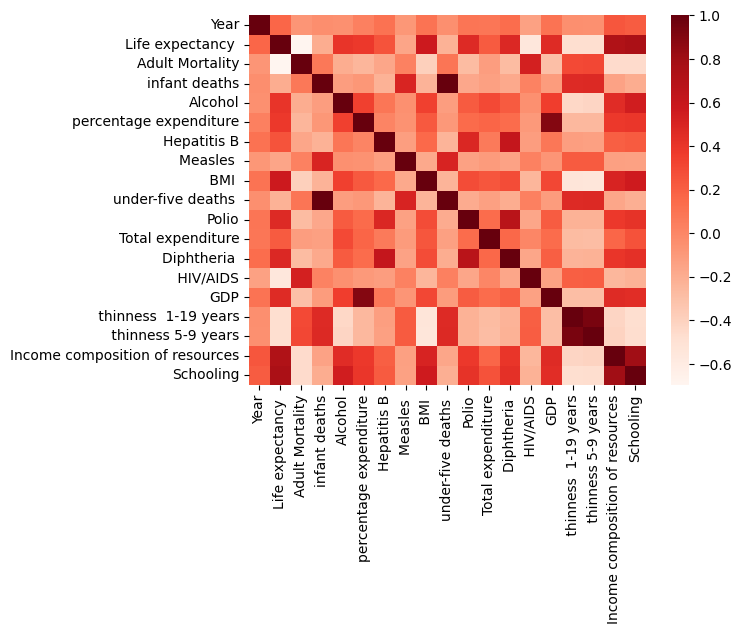

In [13]:
sns.heatmap(data.corr(), cmap="Reds")

* Z heatmapy vidíme, že ```infant deaths``` je skoro závislý na ```under-five deaths```, ```thinness  1-19 years``` je skoro závislý na ```thinness 5-9 years``` a ```Schooling``` na ```Income composition of resources```.
* Z předchozích pozorování víme, že ```infant deaths``` obsahuje trochu méně chybných hodnot než ```under-five deaths```, proto odstraníme ```under-five deaths```.
* Název příznaků ```thinness  1-19 years``` je uveden chybně, protože popis na kaggle říká, že to musí být od 10 do 19. Můžeme v podstatě smazat libovolný z těch dvou příznaků, protože oba sloupce mají skoro stejné hodnoty. Smažeme ```thinness 5-9 years```.
* Příznak ```Income composition of resources``` v sobě už částečně obsahuje příznak ```Schooling```. To můžeme snadno nahlédnout na  [Wikipedii](https://en.wikipedia.org/wiki/Human_Development_Index). Proto můžeme příznak ```Schooling``` smazat.
* Příznak ```percentage expenditure``` musíme smazat protože obsahuje hodně chybných hodnot(zjistil jsem to výše, těch je 44%).


In [14]:
data = data.drop(columns=['percentage expenditure', 
                          ' thinness 5-9 years', 'under-five deaths ', 'Schooling'])
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2375.000000,2928.000000,2896.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2896.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,80.960842,2427.855874,38.235394,82.548298,5.930163,82.321416,1.747712,7494.210719,4.850622,0.627419
std,4.61056,9.523867,124.292079,118.114450,4.050749,25.018337,11485.970937,19.959590,23.416674,2.483273,23.706644,5.085542,14282.251492,4.420829,0.210978
min,2000.00000,36.300000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,3.000000,0.370000,2.000000,0.100000,1.681350,0.100000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,77.000000,0.000000,19.300000,78.000000,4.260000,78.000000,0.100000,463.852618,1.600000,0.493000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,92.000000,17.000000,43.350000,93.000000,5.750000,93.000000,0.100000,1764.973870,3.300000,0.677000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,97.000000,362.250000,56.100000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.200000,0.779250
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,99.000000,212183.000000,77.600000,99.000000,17.600000,99.000000,50.600000,119172.741800,27.700000,0.948000


* Nahradíme hodnoty ve sloupci ```Measles``` ,které jsou mimo rozsah za střední hodnotu ze správných dat v tomto sloupci.

In [15]:
tmp = data[data['Measles '] <= 1000]
data.loc[data['Measles '] > 1000,'Measles '] = tmp['Measles '].mean()
error_values('Measles ', 1000)

False data: 0
Origin data: 2928
In percent: 0.0


* To samé uděláme i pro příznak ```infant deaths```.

In [16]:
tp = data[data['infant deaths'] <= 1000]
data.loc[data['infant deaths'] > 1000, 'infant deaths'] = tp['infant deaths'].mean()
error_values('infant deaths', 1000)

False data: 0
Origin data: 2928
In percent: 0.0


* Zjistíme počet ```NaN``` hodnot v jednotlivých sloupcích.

In [17]:
data.isnull().sum(axis=0)

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
Hepatitis B                        553
Measles                              0
 BMI                                32
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
 thinness  1-19 years               32
Income composition of resources    160
dtype: int64

* Přepíšeme všechny **NaN** hodnoty na střední hodnoty, pomoci funkce ```mean_val```.

In [18]:
def mean_val(name):
    tmp = data[name].mean()
    data[name].fillna(value=tmp, inplace=True)

names = ['Alcohol', 'Hepatitis B', ' BMI ',  'Polio', 'Total expenditure', 
         'Diphtheria ', 'GDP', ' thinness  1-19 years', 'Income composition of resources']

for name in names:
    mean_val(name)

data.isnull().sum(axis=0)

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
Hepatitis B                        0
Measles                            0
 BMI                               0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
Income composition of resources    0
dtype: int64

* Pokud ještě jednou podíváme na závislosti jednotlivých sloupců mezi sebou, to uvidíme že největší korelační koeficient mají jenom z vysvětlovánou proměnnou a sami ze sebou.

<AxesSubplot: >

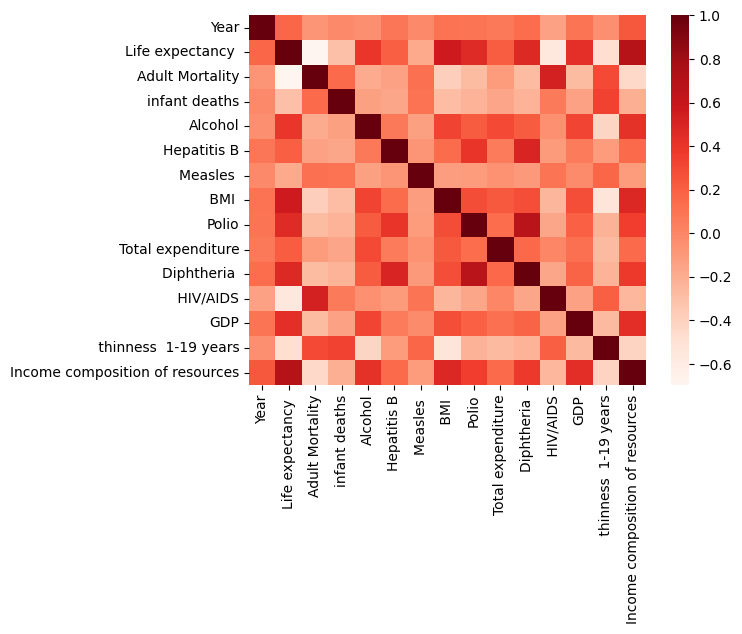

In [19]:
sns.heatmap(data.corr(), cmap="Reds")

* Musíme ještě řešit datatypy příznaků ```Country``` a ```Status```. 
* Převedeme je na ```caregory``` a ```Status``` zakódujeme jako binární příznak s hodnotami 0 a 1, pomoci ```cat.codes```

In [20]:
data['Country'] = data['Country'].astype('category')
data[["Status"]] = data[["Status"]].astype('category').apply(lambda x: x.cat.codes)

* Vytvoříme z příznaků ```Country```, dummy příznaky pomoci ```get_dummies()```

In [21]:
data = pd.get_dummies(data)
display(data.head())

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,2015,1,65.0,263.0,62.0,0.01,65.0,89.34665,19.1,6.0,...,0,0,0,0,0,0,0,0,0,0
1,2014,1,59.9,271.0,64.0,0.01,62.0,492.00000,18.6,58.0,...,0,0,0,0,0,0,0,0,0,0
2,2013,1,59.9,268.0,66.0,0.01,64.0,430.00000,18.1,62.0,...,0,0,0,0,0,0,0,0,0,0
3,2012,1,59.5,272.0,69.0,0.01,67.0,89.34665,17.6,67.0,...,0,0,0,0,0,0,0,0,0,0
4,2011,1,59.2,275.0,71.0,0.01,68.0,89.34665,17.2,68.0,...,0,0,0,0,0,0,0,0,0,0


* Oddělíme cílovou proměnnou od ostatních příznaků

In [22]:
Xdata = data.drop('Life expectancy ', axis = 1)
ydata = data["Life expectancy "]

* Rozdělíme data na validační, trénovací a testovací pomocí train_test_split.

Rozdělení:

* 60% - trénovací

* 20% - validační

* 20% - testovací

In [23]:
random_seed = 42 #constant for random_state

Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size = 0.4, random_state = random_seed) 
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size = 0.5, random_state = random_seed)

## Lineární regrese

* Zkusíme použit lineární regrese. Ta nemá vhodné pro ladění hyperparametry, ale na ně bude vhodné použit normalizaci.
* Vyzkoušime standardizaci, min-max normalizaci a žadnou normalizaci. Otestujeme to na validačni množině.

In [24]:
scaler = MinMaxScaler()
Xtrain_Min_Max = scaler.fit_transform(Xtrain)
Xval_Min_Max = scaler.transform(Xval)
lin_reg = LinearRegression()
lin_reg.fit(Xtrain_Min_Max,ytrain)
RMSE_val_lin_norm = mean_squared_error(yval, lin_reg.predict(Xval_Min_Max), squared=False)
MAE_val_lin_norm = mean_absolute_error(yval, lin_reg.predict(Xval_Min_Max))
print("RMSE_val_lin_normalizace: {0:.6f}".format(RMSE_val_lin_norm))
print("MAE_val_lin_normalizace: {0:.6f}".format(MAE_val_lin_norm))
print("-------------------------------------------------------")


scaler_stand = StandardScaler()
Xtrain_Standard = scaler_stand.fit_transform(Xtrain)
Xval_Standard = scaler_stand.transform(Xval)
lin_reg = LinearRegression()
lin_reg.fit(Xtrain_Standard,ytrain)
RMSE_val_lin_stand = mean_squared_error(yval, lin_reg.predict(Xval_Standard), squared=False)
MAE_val_lin_stand = mean_absolute_error(yval, lin_reg.predict(Xval_Standard))
print("RMSE_val_lin_standardizace: {0:.6f}".format(RMSE_val_lin_stand))
print("MAE_val_lin_standardizace: {0:.6f}".format(MAE_val_lin_stand))
print("-------------------------------------------------------")


lin_reg = LinearRegression()
lin_reg.fit(Xtrain,ytrain)
RMSE_val_lin = mean_squared_error(yval, lin_reg.predict(Xval), squared=False)
MAE_val_lin = mean_absolute_error(yval, lin_reg.predict(Xval))
print("RMSE_val_lin: {0:.6f}".format(RMSE_val_lin))
print("MAE_val_lin: {0:.6f}".format(MAE_val_lin))
print("-------------------------------------------------------")

RMSE_val_lin_normalizace: 1.796623
MAE_val_lin_normalizace: 1.177366
-------------------------------------------------------
RMSE_val_lin_standardizace: 1.796664
MAE_val_lin_standardizace: 1.177415
-------------------------------------------------------
RMSE_val_lin: 1.796622
MAE_val_lin: 1.177361
-------------------------------------------------------


* Vidíme, že ani standardizace ani normalizace nedávají lepší výsledek. 
* Zobrazíme výslednou predikci pomoci grafu.

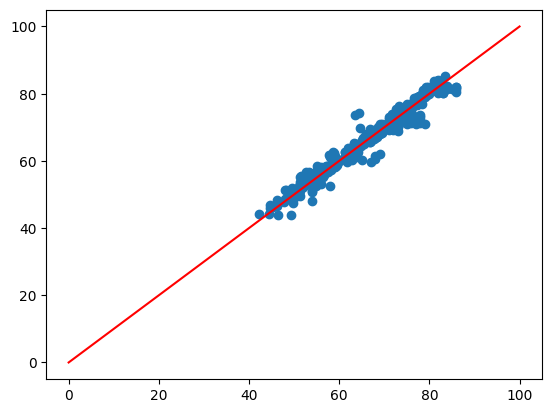

In [25]:
plt.scatter(yval, lin_reg.predict(Xval))
plt.plot([0,100], [0,100], 'r')
plt.show()

## Hřebenová regrese

* Teď zkusím použit hřebenovou regresi. V případě s hřebenovou regresi, zkusím taky aplikovat normalizaci a standardizaci.
* Změřim chybu na validační množině pomoci MAE a RMSE.

In [26]:
ridge = Ridge()
ridge.fit(Xtrain, ytrain)
RMSE_ridge = mean_squared_error(yval, ridge.predict(Xval), squared=False)
MAE_ridge = mean_absolute_error(yval, ridge.predict(Xval))
print("RMSE_ridge: {0:.6f}".format(RMSE_ridge))
print("MAE_val_ridge: {0:.6f}".format(MAE_ridge))
print("-------------------------------------------------------")


scaler = MinMaxScaler()
Xtrain_Min_Max = scaler.fit_transform(Xtrain)
Xval_Min_Max = scaler.transform(Xval)
ridge = Ridge()
ridge.fit(Xtrain_Min_Max, ytrain)
RMSE_ridge_norm = mean_squared_error(yval, ridge.predict(Xval_Min_Max), squared=False)
MAE_ridge_norm = mean_absolute_error(yval, ridge.predict(Xval_Min_Max))
print("RMSE_val_ridge_normalizace: {0:.6f}".format(RMSE_ridge_norm))
print("MAE_val_ridge_normalizace: {0:.6f}".format(MAE_ridge_norm))
print("-------------------------------------------------------")


scaler_stand = StandardScaler()
Xtrain_Standard = scaler_stand.fit_transform(Xtrain)
Xval_Standard = scaler_stand.transform(Xval)
ridge = Ridge()
ridge.fit(Xtrain_Standard, ytrain)
RMSE_ridge_stand = mean_squared_error(yval, ridge.predict(Xval_Standard), squared=False)
MAE_ridge_stand = mean_absolute_error(yval, ridge.predict(Xval_Standard))
print("RMSE_val_ridge_standardizace: {0:.6f}".format(RMSE_ridge_stand))
print("MAE_val_ridge_standardizace: {0:.6f}".format(MAE_ridge_stand))
print("-------------------------------------------------------")


RMSE_ridge: 2.061252
MAE_val_ridge: 1.450527
-------------------------------------------------------
RMSE_val_ridge_normalizace: 2.027437
MAE_val_ridge_normalizace: 1.434109
-------------------------------------------------------
RMSE_val_ridge_standardizace: 1.795449
MAE_val_ridge_standardizace: 1.176703
-------------------------------------------------------


* V případě hřebenové regrese už zjevně vidíme, že použití standardizaci, působí lepší výsledek.
* Teď zkusíme ladit hyperparametry. Napíšeme pomocnou funkci ```find_best_alpha``` která bude vracet RMSE pro jednotlivé alphy. Alpha je hlavní hyperparametr pro hřebenovou regresi.

In [27]:
def find_best_alpha(alpha):
    clf = Ridge(alpha = alpha)
    clf.fit(Xtrain_Standard, ytrain)
    return mean_squared_error(yval, clf.predict(Xval_Standard), squared=False)


* Použijeme na hledání alphy ```minimize_scalar```. Vybereme metod ```bounded```, který bude hledat lokální minimum na zvoleném námi intervalu. Interval nastavíme pomoci parametru ```bounds```.

In [28]:
best_alpha = optimize.minimize_scalar(find_best_alpha, method = 'bounded', bounds=(0.1, 400))
print('best params ', best_alpha)

best params       fun: 1.7880591522858715
 message: 'Solution found.'
    nfev: 14
     nit: 14
  status: 0
 success: True
       x: 15.701085013294215


* Natrénujeme model s použitím nejlepší alphy.

In [29]:
fin_ridge = Ridge(alpha = best_alpha.x)
fin_ridge.fit(Xtrain_Standard, ytrain)

Ridge(alpha=15.701085013294215)

* Změříme výslednou chybu pomoci MAE a RMSE.

In [30]:
RMSE_fin_ridge = mean_squared_error(yval, fin_ridge.predict(Xval_Standard), squared=False)
MAE_fin_ridge = mean_absolute_error(yval, fin_ridge.predict(Xval_Standard))
print("RMSE_val_fin_ridge: {0:.6f}".format(RMSE_fin_ridge))
print("MAE_val_fin_ridge: {0:.6f}".format(MAE_fin_ridge))

RMSE_val_fin_ridge: 1.788059
MAE_val_fin_ridge: 1.176580


* Zobrazíme výslednou predikci pomoci grafu.

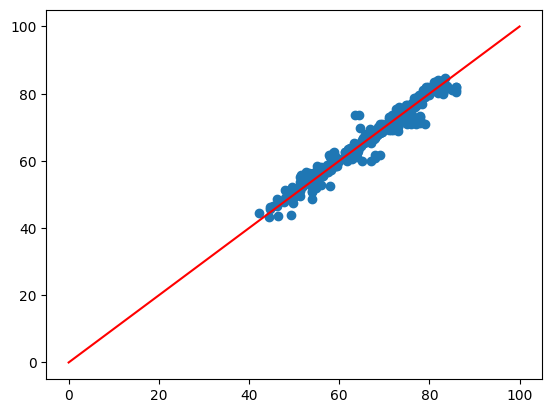

In [31]:
plt.scatter(yval, fin_ridge.predict(Xval_Standard))
plt.plot([0,100], [0,100], 'r')
plt.show()

## Náhodný les

* Na závěr zkusíme použit náhodný les. Ten už nepotřebuje ani normalizaci ani standardizaci.
* Změříme chybu, bez ladění hyperparametrů.

In [32]:
forest = RandomForestRegressor()
forest.fit(Xtrain, ytrain)
RMSE_forest = mean_squared_error(yval, forest.predict(Xval), squared=False)
MAE_forest = mean_absolute_error(yval, forest.predict(Xval))
print("RMSE_val_forest: {0:.6f}".format(RMSE_forest))
print("MAE_val_forest: {0:.6f}".format(MAE_forest))

RMSE_val_forest: 1.769135
MAE_val_forest: 1.134867


* Zkusíme odladit hyperparametry na validační množině.
* Celkem budeme ladit tři hyperparametra:
  1. ```n_estimators``` je počet stromů v lese.(bude poměrně velký)
  2. ```depths``` je hloubka hloubka stromu v lese.(bude poměrně malá)
  3. ```max_features``` je počet příznaků, ze kterých si hladový algoritmus vybírá ten, podle kterého bude v aktuálním kroku větvit.

In [33]:
val_arr = []
hyperparam_arr = {
    'n_estimators': range(10, 500, 40),
    'depths': range(1, 15),
    'max_features':['sqrt', 'log2', None],
}
param = ParameterGrid(hyperparam_arr)
for hyp in param:
    clf = RandomForestRegressor(n_estimators=hyp['n_estimators'], max_depth=hyp['depths'], max_features=hyp['max_features'])
    clf.fit(Xtrain, ytrain)
    val_arr.append(mean_squared_error(yval, clf.predict(Xval), squared=False))




* Najdeme nejlepší hyperparametry.

In [34]:
best_params = param[np.argmin(val_arr)]
print('best params ', best_params)

best params  {'n_estimators': 410, 'max_features': None, 'depths': 13}


* Vykreslíme graf výsledku  ladění hyperparametrů na validační množině. Můžeme snadno zjistit, že zvětšení počtu stromu snižuje výslednou chybu. Ladění v takovém případě trvá docela dlouho.

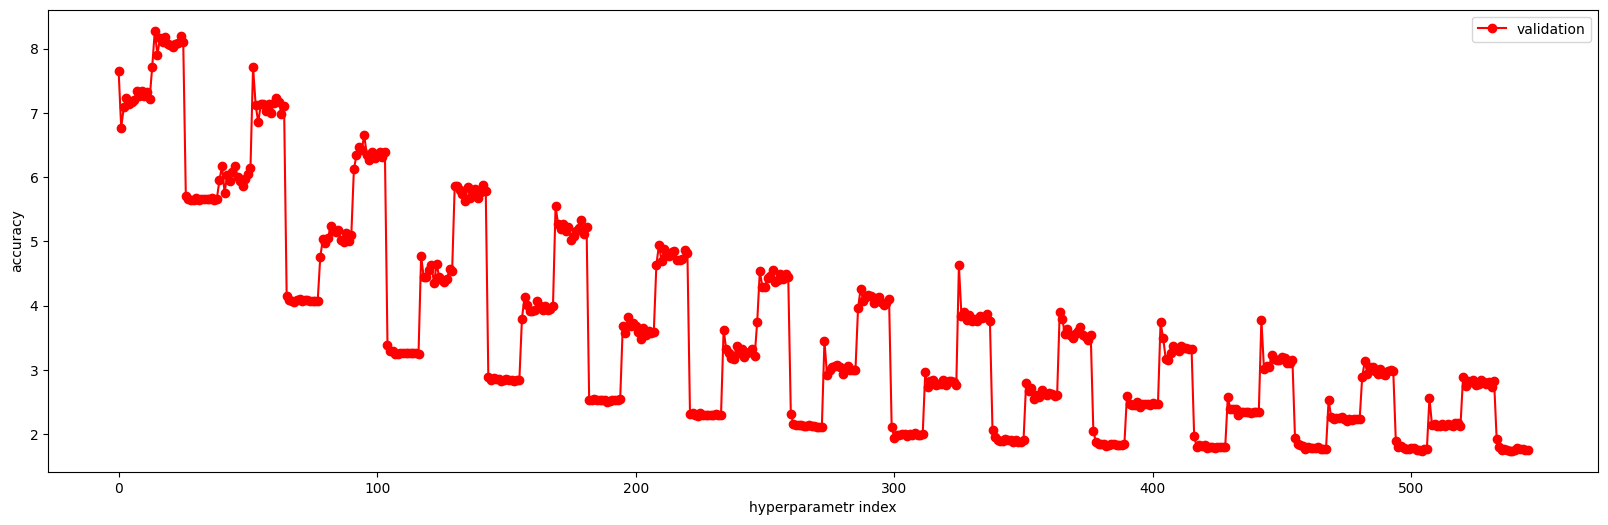

In [35]:
plt.figure(figsize=(20,6))
plt.plot(val_arr,'or-')
plt.xlabel('hyperparametr index')
plt.ylabel('accuracy')
plt.legend(['validation'])

* Natrénujeme model s použitím nejlepších hyperparametrů.

In [36]:
fin_forest = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['depths'], max_features=best_params['max_features'])
fin_forest.fit(Xtrain, ytrain)

RandomForestRegressor(max_depth=13, max_features=None, n_estimators=410)

* Změříme výslednou chybu pomoci MAE a RMSE.

In [37]:
RMSE_fin_forest = mean_squared_error(yval, fin_forest.predict(Xval), squared=False)
MAE_fin_forest = mean_absolute_error(yval, fin_forest.predict(Xval))
print("RMSE_val_fin_forest: {0:.6f}".format(RMSE_fin_forest))
print("MAE_val_fin_forest: {0:.6f}".format(MAE_fin_forest))

RMSE_val_fin_forest: 1.779406
MAE_val_fin_forest: 1.188153


## Závěr

* Ve výsledku náhodný les je zjevně lepší než hřebenová nebo lineární regrese.
* Změříme finální chybu pomoci MAE a RMSE na testovacích datech.

In [38]:
RMSE_fin_forest_test = mean_squared_error(ytest, fin_forest.predict(Xtest), squared=False)
MAE_fin_forest_test = mean_absolute_error(ytest, fin_forest.predict(Xtest))
print("RMSE_test_forest: {0:.6f}".format(RMSE_fin_forest_test))
print("MAE_test_forest: {0:.6f}".format(MAE_fin_forest_test))

RMSE_test_forest: 1.991118
MAE_test_forest: 1.263820


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d191a5a-4800-4aee-b0af-27cd57462fa7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>